In [1]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis \
import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
import QuadraticDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
import matplotlib.patches as mpatches
from matplotlib import colors
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.neighbors as neighbors
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors
from scipy.stats import multivariate_normal
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
img_dir = "D:/vscodepython/Statistical Calculation/Homework7_Com[arison/image_hw7/"


# --------------------------------------------------------------------
# 生成兩群組模擬資料
def param(n1, n2, mean1, mean2, mean3, mean4, val1, val2):
    m1, m2 = np.array([mean1, mean2]), np.array([mean3, mean4])
    Cov1 = np.array([[1, val1], [val1, 1]])
    Cov2 = np.array([[1, val2], [val2, 1]])
    mvn1 = multivariate_normal(mean = m1, cov = Cov1)
    mvn2 = multivariate_normal(mean = m2, cov = Cov2)
    A = mvn1.rvs(n1)
    B = mvn2.rvs(n2)
    Xvar = np.vstack((A, B))#2000*1矩陣\
    y = np.hstack((np.zeros(n1), np.ones(n2)))#2000
    param = np.c_[Xvar, y]
    return param

# -------------------------------------------------------------------
# 生成三群組模擬資料
def param3(n1, n2, n3, mean1, mean2, mean3, mean4, mean5, mean6, val1, val2, val3):
    m1, m2, m3 = np.array([mean1, mean2]), np.array([mean3, mean4]), np.array([mean5, mean6])
    Cov1 = np.array([[1, val1], [val1, 1]])
    Cov2 = np.array([[1, val2], [val2, 1]])
    Cov3 = np.array([[1, val3], [val3, 1]])
    mvn1 = multivariate_normal(mean = m1, cov = Cov1)
    mvn2 = multivariate_normal(mean = m2, cov = Cov2)
    mvn3 = multivariate_normal(mean = m3, cov = Cov3)
    A = mvn1.rvs(n1)
    B = mvn2.rvs(n2)
    C = mvn2.rvs(n3)
    Xvar = np.vstack((A, B, C))#2000*1矩陣\
    y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n3)+1))#2000
    param3 = np.c_[Xvar, y]
    return param3

In [46]:
# ---------------------------------------------------------------
# 兩群組資料生成
# ------------------------------------------------
D = param3(1000, 1000, 1000, 2, 2, 4, 1, 4, 5, 0.1, 0.7, 0.9)
data = X = D[:, 0:2]
label = y = D[:, 2]

# --------------------------------------------------------------
# 加廣線性迴歸與簡單線性迴歸
from sklearn.linear_model import LinearRegression

# -----------------------------------------------
n =100 #模擬次數
Lineartrainerror = np.zeros(n)
Lineartesterror = np.zeros(n)
Augmentedtrainerror = np.zeros(n)
Augmentedtesterror = np.zeros(n)
Logistictrainerror = np.zeros(n)
Logistictesterror = np.zeros(n)

LDAtrainingError = np.zeros(n) #用來存取訓練誤差
LDAtestingError = np.zeros(n) #存取測試誤差
QDAtrainingError = np.zeros(n)
QDAtestingError = np.zeros(n)
KNNtrainingError = np.zeros(n)
KNNtraingError = np.zeros(n)

ANNtrainerror = np.zeros(n)
ANNtesterror = np.zeros(n)

# ------------------------------------------------
#載入套件
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Mdl = LinearRegression()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs',class_weight='balanced',max_iter=1000)

K1 = 5
weights = "uniform"
Knn = neighbors.KNeighborsClassifier(K1, weights = weights)

hidden_layers = (30, )
solver = "adam"
clf = MLPClassifier(max_iter = 10000, solver = solver,
hidden_layer_sizes = hidden_layers, verbose = True,
activation = "logistic", tol = 1e-6, random_state = 0)

# ------------------------------------------------
for i in range(n) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    # --------------------------------------------------
    Mdl.fit(X_train, y_train) 
    y_hat = Mdl.predict(X_train) 
    y_pretrain = [1 if i > 0.5 else 0 for i in y_hat]
    Lineartrainerror[i] = 1- np.mean(y_pretrain == y_train)

    y_hat = Mdl.predict(X_test) 
    y_pretest = [1 if i > 0.5 else 0 for i in y_hat]
    Lineartesterror[i] = 1 - np.mean(y_pretest == y_test)
    # ---------------------------------------------------
    x1 = X_train[:,0:1] 
    x2 = X_train[:,1:2]
    XX = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
    Mdl.fit(XX, y_train) 
    y_hat = Mdl.predict(XX) 
    y_pretrain = [1 if i > 0.5 else 0 for i in y_hat]
    Augmentedtrainerror[i] = 1 - np.mean(y_pretrain == y_train)

    x1 = X_test[:,0:1]
    x2 = X_test[:,1:2]
    XX = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
    y_hat = Mdl.predict(XX) 
    y_pretest = [1 if i > 0.5 else 0 for i in y_hat]
    Augmentedtesterror[i] = 1 - np.mean(y_pretest == y_test)
    # ---------------------------------------------------
    logreg.fit(X_train, y_train)
    y_predict = logreg.predict(X_test)
    Logistictrainerror[i] = 1 - logreg.score(X_train, y_train)
    Logistictesterror[i] = 1 - logreg.score(X_test, y_test)
    # ---------------------------------------------------
    Lda.fit(X_train, y_train)
    Lda.predict(X_test)
    LDAtrainingError[i] = 1 - Lda.score(X_train, y_train)
    LDAtestingError[i] = 1 - Lda.score(X_test, y_test)
    # ---------------------------------------------------
    Qda.fit(X_train, y_train)
    Qda.predict(X_test)
    QDAtrainingError = 1 - Qda.score(X_train, y_train)
    QDAtestingError = 1 - Qda.score(X_test, y_test)
    # ---------------------------------------------------
    Knn.fit(X_train, y_train)
    Knn.predict(X_test)
    KNNtrainingError1 = 1 - Knn.score(X_train, y_train)
    KNNtestingError1 = 1 - Knn.score(X_test, y_test)
    # ---------------------------------------------------
    clf.fit(X_train, y_train)
    y_test_hat = clf.predict(X_test)
    ANNtrainerror[i] = 1 - clf.score(X_train, y_train)
    ANNtesterror[i] = 1 - clf.score(X_test, y_test)


Iteration 1, loss = 1.09338801
Iteration 2, loss = 1.08017350
Iteration 3, loss = 1.06775184
Iteration 4, loss = 1.05489610
Iteration 5, loss = 1.04196657
Iteration 6, loss = 1.02883159
Iteration 7, loss = 1.01490346
Iteration 8, loss = 1.00012644
Iteration 9, loss = 0.98493782
Iteration 10, loss = 0.96915031
Iteration 11, loss = 0.95298471
Iteration 12, loss = 0.93593364
Iteration 13, loss = 0.91889396
Iteration 14, loss = 0.90178065
Iteration 15, loss = 0.88477410
Iteration 16, loss = 0.86762711
Iteration 17, loss = 0.85156269
Iteration 18, loss = 0.83566701
Iteration 19, loss = 0.82073535
Iteration 20, loss = 0.80648596
Iteration 21, loss = 0.79319177
Iteration 22, loss = 0.78089331
Iteration 23, loss = 0.76920557
Iteration 24, loss = 0.75867690
Iteration 25, loss = 0.74859084
Iteration 26, loss = 0.73961222
Iteration 27, loss = 0.73137170
Iteration 28, loss = 0.72375373
Iteration 29, loss = 0.71691931
Iteration 30, loss = 0.71016131
Iteration 31, loss = 0.70428380
Iteration 32, los

In [47]:
print(Lineartrainerror.mean())
print(Augmentedtrainerror.mean())
print(Logistictrainerror.mean())
print(LDAtrainingError.mean())
print(QDAtrainingError.mean())
print(KNNtrainingError1.mean())
print(ANNtrainerror.mean())


print(Lineartesterror.mean())
print(Augmentedtesterror.mean())
print(Logistictesterror.mean())
print(LDAtestingError.mean())
print(QDAtestingError.mean())
print(KNNtestingError1.mean())
print(ANNtesterror.mean())

0.4471041666666666
0.44212083333333324
0.369
0.37139583333333326
0.3683333333333333
0.24208333333333332
0.36707083333333346
0.4481000000000001
0.44311666666666666
0.37605
0.3833499999999999
0.3716666666666667
0.3783333333333333
0.3802833333333333


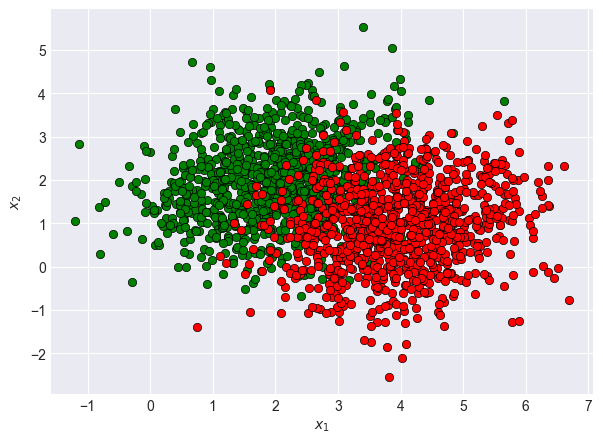

C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_17324\2212543058.py:33: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


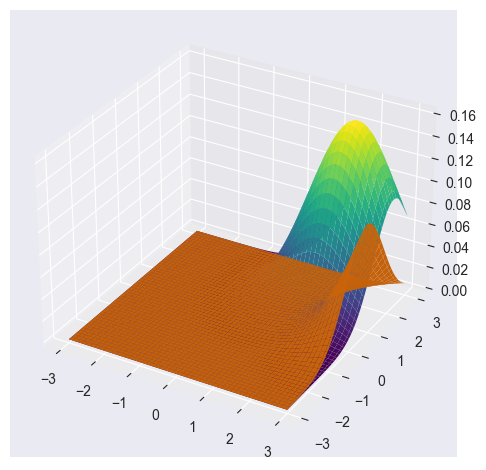

In [6]:
# ------------------------------------------------------------------
# 改變樣本數的繪圖
# ------------------------------------------------------------------
# 繪圖
# 二維繪圖
n1, n2 = 1000, 1000
mean1, mean2, mean3, mean4  = 2, 2, 4, 1
val1, val2 = 0.2, 0.2
m1, m2 = np.array([mean1, mean2]), np.array([mean3, mean4])
Cov1 = np.array([[1, val1], [val1, 1]])
Cov2 = np.array([[1, val2], [val2, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
Xvar = np.vstack((A, B))#2000*1矩陣\
y = np.hstack((np.zeros(n1), np.ones(n2)))#2000
D = np.c_[Xvar, y]

plt.figure(figsize = (7,5))
plt.plot(A[:,0],A[:,1], 'o', c='green',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')

plt.plot(B[:,0],B[:,1], 'o', c='red',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()
plt.show()
#plt.savefig(img_dir+"exampleknn.eps", format="eps")

# -----------------------------------------------------------------
#三維繪圖
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14, 6
fig = plt.figure()
sigma_1, sigma_2 = Cov1[0,0], Cov1[1,1]
x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = mvn1.pdf([X[i,j], Y[i,j]])
key = 131
ax = fig.add_subplot(key, projection = '3d')
ax.plot_surface(X, Y, pdf, cmap = 'viridis')
plt.tight_layout()

# ---------------------------------------------------------------------
#fig = plt.figure()
sigma_1, sigma_2 = Cov2[0,0], Cov2[1,1]
x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = mvn2.pdf([X[i,j], Y[i,j]])
key = 131
#ax = fig.add_subplot(key, projection = '3d')
ax.plot_surface(X, Y, pdf)
plt.tight_layout()
plt.show()
#plt.savefig(img_dir+"exampleknn-3D.eps", format="eps")

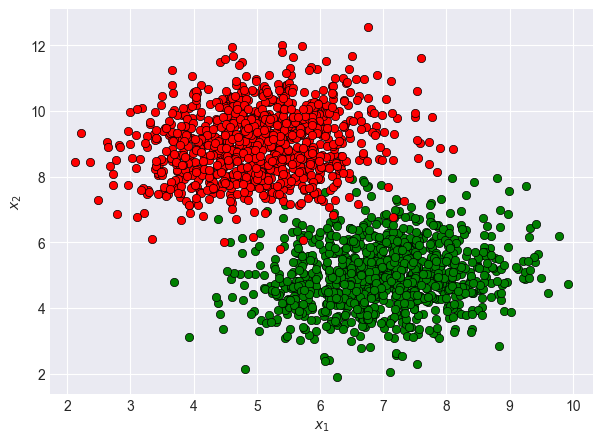

C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_17324\595854456.py:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


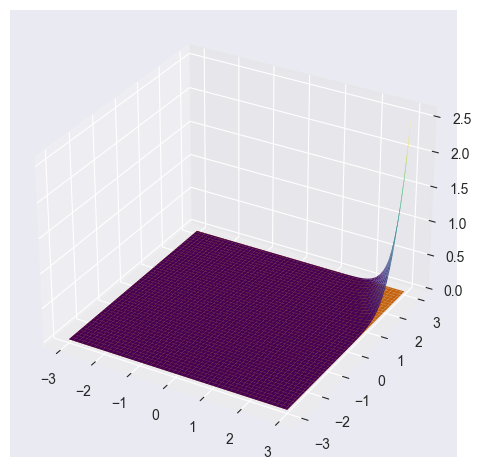

In [10]:
# ------------------------------------------------------------------
# 改變平均數的繪圖
# ------------------------------------------------------------------
# 繪圖
# 二維繪圖
n1, n2 = 1000, 1000
mean1, mean2, mean3, mean4  = 7, 5, 5, 9
val1, val2 = 0.2, 0.2
m1, m2 = np.array([mean1, mean2]), np.array([mean3, mean4])
Cov1 = np.array([[1, val1], [val1, 1]])
Cov2 = np.array([[1, val2], [val2, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
Xvar = np.vstack((A, B))#2000*1矩陣\
y = np.hstack((np.zeros(n1), np.ones(n2)))#2000
D = np.c_[Xvar, y]

plt.figure(figsize = (7,5))
plt.plot(A[:,0],A[:,1], 'o', c='green',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')

plt.plot(B[:,0],B[:,1], 'o', c='red',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()
plt.show()
#plt.savefig(img_dir+"exampleknn.eps", format="eps")

# -----------------------------------------------------------------
#三維繪圖
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14, 6
fig = plt.figure()
sigma_1, sigma_2 = Cov1[0,0], Cov1[1,1]
x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = mvn1.pdf([X[i,j], Y[i,j]])
key = 131
ax = fig.add_subplot(key, projection = '3d')
ax.plot_surface(X, Y, pdf, cmap = 'viridis')
plt.tight_layout()

# ---------------------------------------------------------------------
#fig = plt.figure()
sigma_1, sigma_2 = Cov2[0,0], Cov2[1,1]
x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = mvn2.pdf([X[i,j], Y[i,j]])
key = 131
#ax = fig.add_subplot(key, projection = '3d')
ax.plot_surface(X, Y, pdf)
plt.tight_layout()
plt.show()
#plt.savefig(img_dir+"exampleknn-3D.eps", format="eps")